# 결측치 데이터 모은 데이터 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

In [2]:
train = pd.read_csv('C:/Users/nyc15/Desktop/data/train.csv')
test = pd.read_csv('C:/Users/nyc15/Desktop/data/test_x.csv')

In [3]:
urban = pd.read_csv('urban.csv')
edu = pd.read_csv('edu.csv')
engnatna = pd.read_csv('engnatna.csv')

# urban 가족 사이즈 드랍 안되있는 데이터 갯수 같음 ( 소스 코드 보니 안되어있음 )

In [4]:
urban.shape,edu.shape,engnatna.shape 

((56915, 78), (56912, 79), (56912, 13))

In [5]:
urban # 인덱스를 순서대로 만들고 familysize 이상치 제거 

,Unnamed: 0,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,...,0,1,0,1,1,0,1,0,1,1
1,1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,...,1,1,0,1,1,0,1,0,1,1
2,2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,...,1,1,0,1,1,1,1,0,1,1
3,3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,...,0,0,0,0,1,0,1,0,1,1
4,4,4,1.0,927,1.0,707,5.0,556,2.0,1062,...,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56910,56910,11378,5.0,427,5.0,1066,5.0,588,1.0,560,...,1,1,0,1,1,0,1,0,1,1
56911,56911,11379,1.0,314,5.0,554,5.0,230,1.0,956,...,1,1,1,1,1,1,1,1,1,1
56912,56912,11380,1.0,627,2.0,799,1.0,739,2.0,1123,...,1,1,0,1,1,0,1,0,1,1
56913,56913,11381,2.0,539,1.0,2090,2.0,4642,1.0,673,...,1,0,0,1,1,0,1,1,1,0


In [6]:
urban = urban.drop(columns = ['Unnamed: 0','index']).reset_index()
urban

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,...,0,1,0,1,1,0,1,0,1,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,...,1,1,0,1,1,0,1,0,1,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,...,1,1,0,1,1,1,1,0,1,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,...,0,0,0,0,1,0,1,0,1,1
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,...,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56910,56910,5.0,427,5.0,1066,5.0,588,1.0,560,2.0,...,1,1,0,1,1,0,1,0,1,1
56911,56911,1.0,314,5.0,554,5.0,230,1.0,956,2.0,...,1,1,1,1,1,1,1,1,1,1
56912,56912,1.0,627,2.0,799,1.0,739,2.0,1123,1.0,...,1,1,0,1,1,0,1,0,1,1
56913,56913,2.0,539,1.0,2090,2.0,4642,1.0,673,2.0,...,1,0,0,1,1,0,1,1,1,0


In [7]:
urban = urban.drop(index= urban[urban.familysize >=100].index) # 가족 사이즈 3개 열 (2147483647 , 999 , 100) 제거 

# 데이터 인덱스 일치 작업 set_index = index

In [8]:
urban= urban.set_index('index')

In [9]:
edu.head() # 정렬 필요 

,Unnamed: 0,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,...,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,agenum
0,113,113,3.0,749,3.0,539,4.0,487,2.0,937,...,1,0,1,1,0,1,0,1,1,10
1,262,262,1.0,402,4.0,1117,4.0,676,1.0,1056,...,1,0,1,1,0,1,0,1,1,30
2,439,439,3.0,395,4.0,1700,1.0,664,2.0,562,...,0,0,1,1,0,1,0,1,1,20
3,537,537,1.0,456,5.0,1515,4.0,1312,2.0,3694,...,1,0,1,1,0,1,1,1,1,20
4,715,715,1.0,275,5.0,1307,4.0,861,1.0,615,...,1,1,1,1,0,1,0,1,1,10


In [10]:
engnatna # 인덱스 컬럼 정렬되어 있음

,Unnamed: 0,age_group,education,engnat,familysize,gender,hand,married,race,religion,urban,index,level_0
0,0,30s,2,1,4,Female,1,3,White,Other,1,0,NaN
1,1,20s,4,2,3,Female,1,1,Asian,Hindu,3,1,NaN
2,2,30s,3,1,3,Male,1,2,White,Other,2,2,NaN
3,3,20s,4,2,0,Female,1,1,Asian,Hindu,3,3,NaN
4,4,20s,3,1,2,Male,1,2,White,Agnostic,1,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56907,56910,20s,3,2,3,Female,1,1,Other,Christian_Catholic,0,56910,NaN
56908,56911,10s,2,2,1,Female,1,1,Asian,Agnostic,2,56911,NaN
56909,56912,30s,4,1,4,Male,1,2,White,Atheist,1,56912,NaN
56910,56913,40s,2,1,3,Female,1,2,White,Atheist,2,56913,NaN


In [11]:
edu = edu.sort_values(by='index').set_index('index')
engnatna = engnatna.set_index('index')

In [12]:
data = urban.copy()
data

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
index,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,...,0,1,0,1,1,0,1,0,1,1
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,...,1,1,0,1,1,0,1,0,1,1
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,...,1,1,0,1,1,1,1,0,1,1
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,...,0,0,0,0,1,0,1,0,1,1
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,...,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56910,5.0,427,5.0,1066,5.0,588,1.0,560,2.0,1110,...,1,1,0,1,1,0,1,0,1,1
56911,1.0,314,5.0,554,5.0,230,1.0,956,2.0,1173,...,1,1,1,1,1,1,1,1,1,1
56912,1.0,627,2.0,799,1.0,739,2.0,1123,1.0,829,...,1,1,0,1,1,0,1,0,1,1


In [13]:
data['education'] = edu.education
data.isnull().sum()[data.isnull().sum()>0] # 결측치 없음

Series([], dtype: int64)

In [14]:
data['engnat'] = engnatna.engnat 
data.isnull().sum()[data.isnull().sum() >0] # 결측치 없음

Series([], dtype: int64)

# 질문 시간 데이터 이분화 0과 1 ( 0: 걸린 시간이 적다. 1: 걸린 시간이 크다)
- 순서형 데이터 
- 나이를 순서형 데이터 age 컬럼과 명목형 age_group 컬럼으로 구분 

In [15]:
data['age'] = data['age_group'].map({'10s':10, '20s':20, '30s':30, '40s':40, '50s':50, '60s':60, '+70s':70})

In [16]:
data

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,age
index,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,...,1,0,1,1,0,1,0,1,1,30
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,...,1,0,1,1,0,1,0,1,1,20
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,...,1,0,1,1,1,1,0,1,1,30
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,...,0,0,0,1,0,1,0,1,1,20
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,...,1,1,1,1,0,1,1,1,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56910,5.0,427,5.0,1066,5.0,588,1.0,560,2.0,1110,...,1,0,1,1,0,1,0,1,1,20
56911,1.0,314,5.0,554,5.0,230,1.0,956,2.0,1173,...,1,1,1,1,1,1,1,1,1,10
56912,1.0,627,2.0,799,1.0,739,2.0,1123,1.0,829,...,1,0,1,1,0,1,0,1,1,30


In [17]:
Qtime = data.iloc[:,1::2].iloc[:,:20]
Qtime.head()

,QaE,QbE,QcE,QdE,QeE,QfE,QgE,QhE,QiE,QjE,QkE,QlE,QmE,QnE,QoE,QpE,QqE,QrE,QsE,QtE
index,,,,,,,,,,,,,,,,,,,,
0,363,1370,997,1024,1577,539,586,1095,1142,1287,883,851,851,816,579,924,366,876,633,1115
1,647,1313,3387,2969,4320,2190,826,4082,1867,1264,2943,3927,4329,1828,1214,2414,1356,3039,4304,1346
2,1623,1480,1021,3374,1333,531,1167,1016,2653,1569,998,2547,918,2153,1304,1131,937,1327,1170,1409
3,504,2311,992,3245,357,1519,159,2275,2809,5614,3219,1296,9046,1216,1169,23868,581,8830,2392,1312
4,927,707,556,1062,1014,628,991,1259,1153,1388,740,1181,547,575,754,1140,323,1070,583,1889


In [18]:
Qtimes = pd.DataFrame(np.where(Qtime>Qtime.median(),1,0),index = Qtime.index,columns = Qtime.columns)
Qtimes

,QaE,QbE,QcE,QdE,QeE,QfE,QgE,QhE,QiE,QjE,QkE,QlE,QmE,QnE,QoE,QpE,QqE,QrE,QsE,QtE
index,,,,,,,,,,,,,,,,,,,,
0,0,1,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,0,1,0,1,1,0,1,1,1,1,1,1,1,1,1
3,0,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1
4,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56910,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
56911,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
56912,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1


In [19]:
data['QaE	QbE	QcE	QdE	QeE	QfE	QgE	QhE	QiE	QjE	QkE	QlE	QmE	QnE	QoE	QpE	QqE	QrE	QsE	QtE'.split('\t')] = Qtimes

In [20]:
data

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,age
index,,,,,,,,,,,,,,,,,,,,,
0,3.0,0,4.0,1,5.0,1,1.0,1,2.0,1,...,1,0,1,1,0,1,0,1,1,30
1,5.0,1,5.0,1,3.0,1,5.0,1,1.0,1,...,1,0,1,1,0,1,0,1,1,20
2,4.0,1,1.0,1,1.0,1,4.0,1,5.0,1,...,1,0,1,1,1,1,0,1,1,30
3,3.0,0,3.0,1,4.0,1,3.0,1,1.0,0,...,0,0,0,1,0,1,0,1,1,20
4,1.0,1,1.0,0,5.0,0,2.0,1,1.0,0,...,1,1,1,1,0,1,1,1,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56910,5.0,0,5.0,0,5.0,0,1.0,0,2.0,0,...,1,0,1,1,0,1,0,1,1,20
56911,1.0,0,5.0,0,5.0,0,1.0,1,2.0,1,...,1,1,1,1,1,1,1,1,1,10
56912,1.0,1,2.0,0,1.0,0,2.0,1,1.0,0,...,1,0,1,1,0,1,0,1,1,30


In [21]:
(data.corr(method='spearman')['QaE	QbE	QcE	QdE	QeE	QfE	QgE	QhE	QiE	QjE	QkE	QlE	QmE	QnE	QoE	QpE	QqE	QrE	QsE	QtE'.split('\t')].abs() >0.3).sum()
# 연관성이 높은 데이터는 자기 자신 밖에 없다. 

QaE    1
QbE    1
QcE    2
QdE    2
QeE    2
QfE    1
QgE    1
QhE    1
QiE    1
QjE    6
QkE    1
QlE    2
QmE    2
QnE    1
QoE    1
QpE    1
QqE    1
QrE    1
QsE    1
QtE    1
dtype: int64

In [22]:
spdf = data.corr(method='spearman')['QaE	QbE	QcE	QdE	QeE	QfE	QgE	QhE	QiE	QjE	QkE	QlE	QmE	QnE	QoE	QpE	QqE	QrE	QsE	QtE'.split('\t')]
spdf

,QaE,QbE,QcE,QdE,QeE,QfE,QgE,QhE,QiE,QjE,QkE,QlE,QmE,QnE,QoE,QpE,QqE,QrE,QsE,QtE
QaA,0.100864,0.020581,0.062665,0.086971,0.037654,0.034314,0.024372,-0.044766,-0.032919,0.022887,-0.100122,0.047141,0.023657,0.000827,0.011923,0.001333,-0.011075,0.016313,0.045068,0.023775
QaE,1.000000,0.217915,0.229899,0.232850,0.234853,0.238719,0.244447,0.203577,0.190434,0.232499,0.173249,0.225647,0.230496,0.220761,0.219707,0.219110,0.231058,0.233448,0.241881,0.222975
QbA,-0.137928,-0.146831,-0.152440,-0.139790,-0.129494,-0.113202,-0.100827,-0.014417,-0.050565,-0.117624,0.023666,-0.119833,-0.129491,-0.091477,-0.130977,-0.066683,-0.079345,-0.106464,-0.139638,-0.133454
QbE,0.217915,1.000000,0.273932,0.268308,0.275653,0.247821,0.253829,0.259699,0.243322,0.289183,0.220515,0.268977,0.271365,0.232815,0.278570,0.269539,0.237138,0.262440,0.273192,0.272139
QcA,-0.086328,-0.061128,-0.183943,-0.112866,-0.086482,-0.062453,-0.056510,0.013080,-0.007936,-0.082075,0.067199,-0.089611,-0.072193,-0.045408,-0.068705,-0.022904,-0.032549,-0.066993,-0.094556,-0.079761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wr_10,-0.013314,-0.022575,-0.048069,-0.051039,-0.043280,-0.032749,-0.037229,-0.021334,-0.018266,-0.046853,-0.030712,-0.048356,-0.039750,-0.031268,-0.025302,-0.025382,-0.019049,-0.020417,-0.039590,-0.018994
wr_11,-0.009882,-0.069498,-0.084455,-0.109833,-0.113845,-0.081051,-0.071632,-0.082731,-0.068465,-0.121851,-0.071656,-0.099849,-0.073784,-0.062036,-0.059116,-0.068356,-0.056830,-0.069665,-0.074566,-0.061735
wr_12,0.002148,-0.017782,-0.034749,-0.044762,-0.027949,-0.023085,-0.022720,-0.018270,-0.013543,-0.036677,-0.025766,-0.028371,-0.025933,-0.019187,-0.014690,-0.011122,-0.005453,-0.014474,-0.031799,-0.014129
wr_13,-0.029844,-0.048401,-0.080121,-0.094473,-0.079405,-0.069311,-0.069637,-0.051188,-0.047786,-0.086944,-0.065031,-0.080361,-0.084856,-0.061851,-0.057613,-0.055772,-0.043968,-0.044333,-0.073576,-0.051231


In [23]:
(spdf.abs() >0.3).sum()

QaE    1
QbE    1
QcE    2
QdE    2
QeE    2
QfE    1
QgE    1
QhE    1
QiE    1
QjE    6
QkE    1
QlE    2
QmE    2
QnE    1
QoE    1
QpE    1
QqE    1
QrE    1
QsE    1
QtE    1
dtype: int64

In [24]:
spdf.abs()[spdf['QjE'].abs()>0.3]['QjE'] # 질문 시간 사이 관계 j 와 c d e l m ??

QcE    0.300253
QdE    0.307562
QeE    0.310900
QjE    1.000000
QlE    0.307176
QmE    0.305910
Name: QjE, dtype: float64

In [25]:
spdf.abs()[spdf['QcE'].abs()>0.3]['QcE'] # 질문 시간 사이 관계  c와 j

QcE    1.000000
QjE    0.300253
Name: QcE, dtype: float64

In [26]:
spdf.abs()[spdf['QdE'].abs()>0.3]['QdE'] # 질문 시간 사이 관계 d 와 j

QdE    1.000000
QjE    0.307562
Name: QdE, dtype: float64

In [27]:
spdf.abs()[spdf['QeE'].abs()>0.3]['QeE'] # 질문 시간 사이 관계  e와 j


QeE    1.0000
QjE    0.3109
Name: QeE, dtype: float64

In [28]:
spdf.abs()[spdf['QlE'].abs()>0.3]['QlE'] # 질문 시간 사이 관계 


QjE    0.307176
QlE    1.000000
Name: QlE, dtype: float64

In [29]:
spdf.abs()[spdf['QmE'].abs()>0.3]['QmE'] # 질문 시간 사이 관계 


QjE    0.30591
QmE    1.00000
Name: QmE, dtype: float64

# 질문 사이 corr 상관관계가 0.3 정도 있다.

In [30]:
Qaswer = data.iloc[:,::2].iloc[:,:20]
Qaswer.head()

,QaA,QbA,QcA,QdA,QeA,QfA,QgA,QhA,QiA,QjA,QkA,QlA,QmA,QnA,QoA,QpA,QqA,QrA,QsA,QtA
index,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,5.0,1.0,2.0,5.0,2.0,4.0,5.0,4.0,4.0,4.0,2.0,5.0,2.0,2.0,2.0,2.0,2.0,1.0
1,5.0,5.0,3.0,5.0,1.0,3.0,1.0,1.0,5.0,3.0,5.0,4.0,1.0,5.0,1.0,5.0,5.0,1.0,4.0,1.0
2,4.0,1.0,1.0,4.0,5.0,1.0,4.0,1.0,3.0,2.0,5.0,5.0,2.0,4.0,2.0,1.0,5.0,4.0,1.0,1.0
3,3.0,3.0,4.0,3.0,1.0,2.0,4.0,3.0,5.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,5.0
4,1.0,1.0,5.0,2.0,1.0,2.0,1.0,1.0,5.0,5.0,5.0,5.0,4.0,2.0,1.0,4.0,5.0,5.0,1.0,2.0


In [31]:
Qaswer[["QeA", "QfA", "QkA", "QqA", "QrA", "QaA", "QdA", "QgA", "QiA", "QnA"]] = 6 - Qaswer[["QeA", "QfA", "QkA", "QqA", "QrA", "QaA", "QdA", "QgA", "QiA", "QnA"]]

In [32]:
Qaswer.head()

,QaA,QbA,QcA,QdA,QeA,QfA,QgA,QhA,QiA,QjA,QkA,QlA,QmA,QnA,QoA,QpA,QqA,QrA,QsA,QtA
index,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,5.0,5.0,4.0,1.0,4.0,4.0,1.0,4.0,2.0,4.0,2.0,1.0,2.0,2.0,4.0,4.0,2.0,1.0
1,1.0,5.0,3.0,1.0,5.0,3.0,5.0,1.0,1.0,3.0,1.0,4.0,1.0,1.0,1.0,5.0,1.0,5.0,4.0,1.0
2,2.0,1.0,1.0,2.0,1.0,5.0,2.0,1.0,3.0,2.0,1.0,5.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0
3,3.0,3.0,4.0,3.0,5.0,4.0,2.0,3.0,1.0,4.0,3.0,4.0,4.0,2.0,4.0,4.0,3.0,2.0,4.0,5.0
4,5.0,1.0,5.0,4.0,5.0,4.0,5.0,1.0,1.0,5.0,1.0,5.0,4.0,4.0,1.0,4.0,1.0,1.0,1.0,2.0


In [33]:
data['MachScore']=Qaswer.mean(axis = 1)
data

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,age,MachScore
index,,,,,,,,,,,,,,,,,,,,,
0,3.0,0,4.0,1,5.0,1,1.0,1,2.0,1,...,0,1,1,0,1,0,1,1,30,2.95
1,5.0,1,5.0,1,3.0,1,5.0,1,1.0,1,...,0,1,1,0,1,0,1,1,20,2.60
2,4.0,1,1.0,1,1.0,1,4.0,1,5.0,1,...,0,1,1,1,1,0,1,1,30,1.90
3,3.0,0,3.0,1,4.0,1,3.0,1,1.0,0,...,0,0,1,0,1,0,1,1,20,3.35
4,1.0,1,1.0,0,5.0,0,2.0,1,1.0,0,...,1,1,1,0,1,1,1,1,20,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56910,5.0,0,5.0,0,5.0,0,1.0,0,2.0,0,...,0,1,1,0,1,0,1,1,20,3.20
56911,1.0,0,5.0,0,5.0,0,1.0,1,2.0,1,...,1,1,1,1,1,1,1,1,10,4.55
56912,1.0,1,2.0,0,1.0,0,2.0,1,1.0,0,...,0,1,1,0,1,0,1,1,30,3.15


In [41]:
(data.isnull().sum() >0).sum()  # 결측치 없음 

0

In [36]:
data

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,age,MachScore
index,,,,,,,,,,,,,,,,,,,,,
0,3.0,0,4.0,1,5.0,1,1.0,1,2.0,1,...,0,1,1,0,1,0,1,1,30,2.95
1,5.0,1,5.0,1,3.0,1,5.0,1,1.0,1,...,0,1,1,0,1,0,1,1,20,2.60
2,4.0,1,1.0,1,1.0,1,4.0,1,5.0,1,...,0,1,1,1,1,0,1,1,30,1.90
3,3.0,0,3.0,1,4.0,1,3.0,1,1.0,0,...,0,0,1,0,1,0,1,1,20,3.35
4,1.0,1,1.0,0,5.0,0,2.0,1,1.0,0,...,1,1,1,0,1,1,1,1,20,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56910,5.0,0,5.0,0,5.0,0,1.0,0,2.0,0,...,0,1,1,0,1,0,1,1,20,3.20
56911,1.0,0,5.0,0,5.0,0,1.0,1,2.0,1,...,1,1,1,1,1,1,1,1,10,4.55
56912,1.0,1,2.0,0,1.0,0,2.0,1,1.0,0,...,0,1,1,0,1,0,1,1,30,3.15


# 명목형 순서형 데이터 나누기 

In [37]:
data.columns

Index(['QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA', 'QeE',
       'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA', 'QjE',
       'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA', 'QoE',
       'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA', 'QtE',
       'age_group', 'education', 'engnat', 'familysize', 'gender', 'hand',
       'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04', 'tp05',
       'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'wf_01', 'wf_02',
       'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06', 'wr_07',
       'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13', 'age',
       'MachScore'],
      dtype='object')

In [38]:
ordinal = ['QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA', 'QeE',
       'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA', 'QjE',
       'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA', 'QoE',
       'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA', 'QtE',
       'familysize','tp01', 'tp02', 'tp03', 'tp04', 'tp05','tp06', 'tp07', 
       'tp08', 'tp09', 'tp10','age','MachScore','education']

In [39]:
nominal = ['engnat','gender','hand','married','race','religion' ]

In [43]:
coror = data[ordinal].corr(method ='spearman' )
coror

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,tp04,tp05,tp06,tp07,tp08,tp09,tp10,age,MachScore,education
QaA,1.000000,0.100864,-0.246558,0.020581,-0.324212,0.062665,0.333163,0.086971,0.238042,0.037654,...,-0.063145,0.021927,0.026656,-0.251276,0.022304,0.017614,-0.064223,0.066912,-0.524346,0.027048
QaE,0.100864,1.000000,-0.137928,0.217915,-0.086328,0.229899,0.057908,0.232850,0.067778,0.234853,...,0.025424,-0.018354,0.016716,-0.118179,0.061939,-0.042062,0.024654,0.195007,-0.167972,0.087427
QbA,-0.246558,-0.137928,1.000000,-0.146831,0.395726,-0.152440,-0.225754,-0.139790,-0.215360,-0.129494,...,0.025712,-0.029343,-0.045655,0.282312,-0.069631,0.004868,0.020623,-0.218660,0.625010,-0.155724
QbE,0.020581,0.217915,-0.146831,1.000000,-0.061128,0.273932,0.042960,0.268308,0.063173,0.275653,...,0.014026,-0.012652,0.002923,-0.093520,0.042470,-0.031060,0.020484,0.115413,-0.135052,0.034338
QcA,-0.324212,-0.086328,0.395726,-0.061128,1.000000,-0.183943,-0.271245,-0.112866,-0.224926,-0.086482,...,0.013737,-0.003394,-0.072482,0.286924,-0.032889,0.007266,0.024971,-0.057384,0.622654,-0.021991
QcE,0.062665,0.229899,-0.152440,0.273932,-0.183943,1.000000,0.087301,0.288024,0.100657,0.282787,...,0.016360,-0.016471,0.021181,-0.125748,0.050299,-0.035467,0.017598,0.128087,-0.204447,0.063550
QdA,0.333163,0.057908,-0.225754,0.042960,-0.271245,0.087301,1.000000,0.197690,0.207389,0.057119,...,0.002432,0.017531,0.020386,-0.169378,0.042032,-0.046219,-0.067832,0.029745,-0.463503,0.031685
QdE,0.086971,0.232850,-0.139790,0.268308,-0.112866,0.288024,0.197690,1.000000,0.119312,0.298601,...,0.024891,-0.013627,0.012282,-0.121239,0.054991,-0.045813,0.016533,0.098921,-0.206612,0.053517
QeA,0.238042,0.067778,-0.215360,0.063173,-0.224926,0.100657,0.207389,0.119312,1.000000,0.132474,...,-0.061957,0.030507,0.021191,-0.176986,0.019456,0.034949,-0.040477,-0.002080,-0.404409,0.011633
QeE,0.037654,0.234853,-0.129494,0.275653,-0.086482,0.282787,0.057119,0.298601,0.132474,1.000000,...,0.007923,-0.022530,0.014481,-0.105264,0.058999,-0.030310,0.020496,0.075305,-0.157068,0.044153


In [44]:
# 상관 관계가 높은 것들은 몇 개가 있을까 계수 0.5 이상 

In [56]:
((coror.abs()>0.5)&(coror != 1)).sum().sort_values(ascending = False)


MachScore     16
QnA            3
QfA            2
QkA            2
QsA            1
QbA            1
QcA            1
QgA            1
QiA            1
QjA            1
QmA            1
QoA            1
QpA            1
QqA            1
QrA            1
education      1
tp06           1
tp01           1
age            1
tp09           1
QtA            1
tp04           1
QaA            1
QpE            0
QhA            0
QaE            0
QrE            0
QbE            0
tp10           0
QcE            0
QdA            0
QdE            0
QeA            0
QeE            0
QtE            0
QfE            0
tp08           0
QgE            0
QhE            0
QoE            0
tp07           0
QiE            0
QqE            0
QjE            0
tp05           0
QkE            0
QlA            0
QlE            0
familysize     0
QmE            0
tp03           0
QnE            0
tp02           0
QsE            0
dtype: int64

In [66]:
indcor = ((coror.abs()>0.5)&(coror != 1)).sum().sort_values(ascending = False)[:23].index.values

<AxesSubplot:>

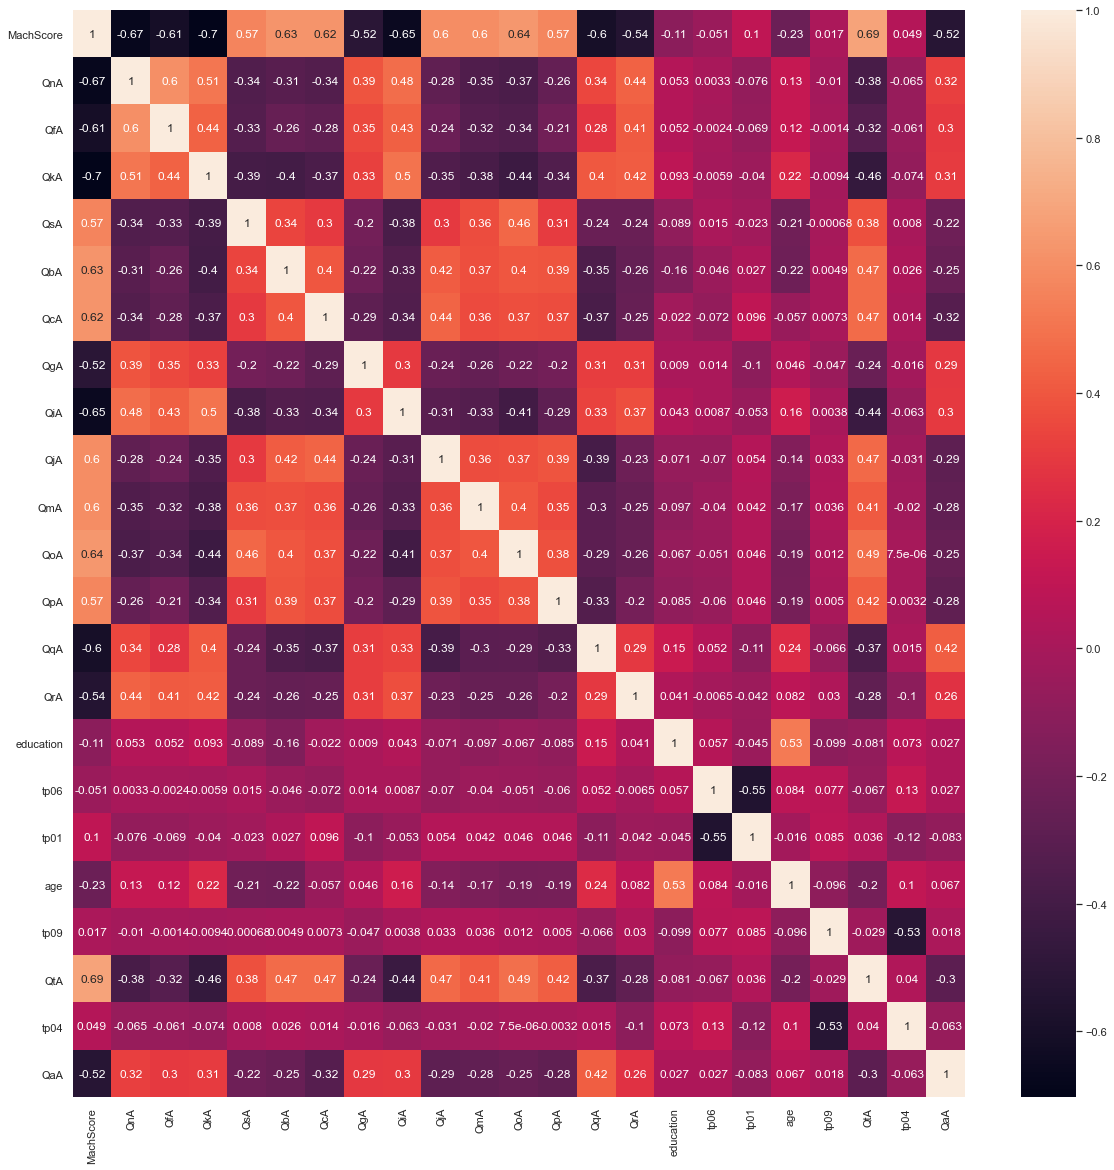

In [68]:
plt.figure(figsize = (20,20))
sns.heatmap(data[indcor].corr(method='spearman'),annot = True)

# 마키아벨리 점수와 문항간 관계 => 당연
# 나이와 교육 사이 관계 => 이것도 알고 있는 것 
# tp01 tp06  /// tp04 tp09 
# 뭔가 있는거 같은데 안보임 

In [75]:
nominal

['engnat', 'gender', 'hand', 'married', 'race', 'religion']

In [84]:
data[nominal].groupby(['race', 'religion']).size()

race   religion          
Arab   Agnostic                78
       Atheist                 66
       Buddhist                 4
       Christian_Catholic      22
       Christian_Mormon         2
                             ... 
White  Hindu                   27
       Jewish                 526
       Muslim                 116
       Other                 3872
       Sikh                     8
Length: 81, dtype: int64

In [134]:
qt =  ['QaE', 'QbE',  'QcE', 'QdE',  'QeE','QfE',  'QgE',  'QhE',  'QiE',  'QjE','QkE',  'QlE',  'QmE',  'QnE',  'QoE','QpE',  'QqE',  'QrE',  'QsE',  'QtE']
data.groupby('engnat')[qt].mean()

,QaE,QbE,QcE,QdE,QeE,QfE,QgE,QhE,QiE,QjE,QkE,QlE,QmE,QnE,QoE,QpE,QqE,QrE,QsE,QtE
engnat,,,,,,,,,,,,,,,,,,,,
1,0.480711,0.471743,0.462702,0.445323,0.444187,0.448610,0.466328,0.481242,0.468721,0.452671,0.459850,0.459850,0.452115,0.460720,0.464781,0.469857,0.470776,0.479091,0.464080,0.471308
2,0.550122,0.573414,0.598958,0.643933,0.646764,0.635761,0.586475,0.549286,0.581071,0.624244,0.604748,0.606743,0.625273,0.602947,0.592523,0.579591,0.576760,0.554884,0.592266,0.574572


In [185]:
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

Text(0.5, 0, "['1=Yes', '2=No']")

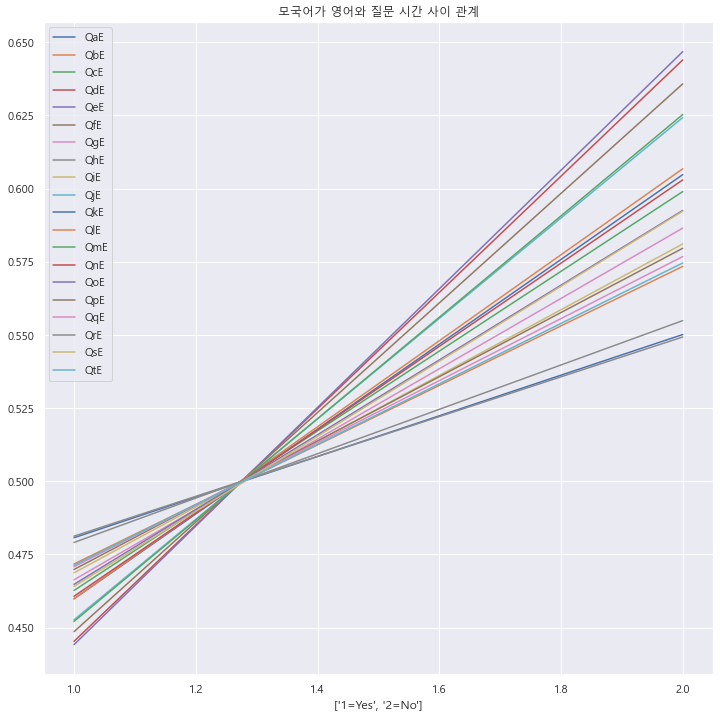

In [206]:
plt.figure(figsize=(12,12))
plt.plot(data.groupby('engnat')[qt].mean())
plt.legend(qt)
plt.title('모국어가 영어와 질문 시간 사이 관계')
plt.xlabel(['1=Yes', '2=No'] )

In [169]:
data.groupby('gender')[qt].mean()

,QaE,QbE,QcE,QdE,QeE,QfE,QgE,QhE,QiE,QjE,QkE,QlE,QmE,QnE,QoE,QpE,QqE,QrE,QsE,QtE
gender,,,,,,,,,,,,,,,,,,,,
Female,0.509164,0.496507,0.499061,0.497747,0.506685,0.489860,0.495531,0.462030,0.478893,0.477954,0.445016,0.492601,0.497221,0.490911,0.492977,0.486705,0.487193,0.504206,0.495981,0.493465
Male,0.491316,0.502146,0.500660,0.501156,0.493198,0.508387,0.502311,0.533052,0.517434,0.518490,0.547250,0.506439,0.501321,0.507165,0.505547,0.511358,0.510731,0.495906,0.501816,0.504821


Text(0.5, 1.0, '성별과 답변 시간과의 관계')

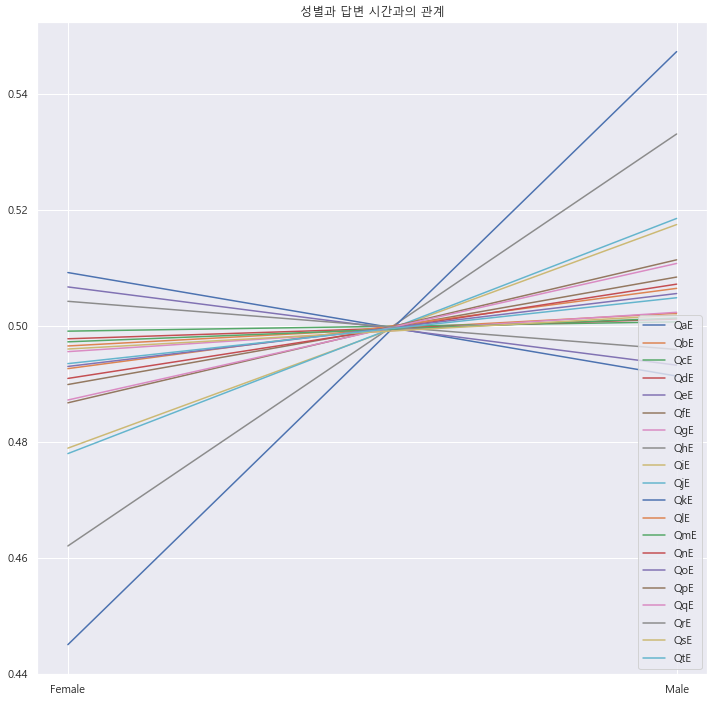

In [198]:
plt.figure(figsize=(12,12))
plt.plot(data.groupby('gender')[qt].mean())
plt.legend(qt)
plt.title('성별과 답변 시간과의 관계')


In [173]:
data.groupby('hand')[qt].mean()

,QaE,QbE,QcE,QdE,QeE,QfE,QgE,QhE,QiE,QjE,QkE,QlE,QmE,QnE,QoE,QpE,QqE,QrE,QsE,QtE
hand,,,,,,,,,,,,,,,,,,,,
0,0.532338,0.532338,0.582090,0.597015,0.542289,0.517413,0.517413,0.562189,0.497512,0.547264,0.577114,0.547264,0.572139,0.512438,0.587065,0.606965,0.552239,0.567164,0.552239,0.547264
1,0.505402,0.504972,0.505749,0.504583,0.504317,0.504706,0.504747,0.502210,0.502578,0.504440,0.504665,0.503478,0.504624,0.505688,0.506261,0.505013,0.505340,0.506036,0.504501,0.505217
2,0.475971,0.477510,0.480417,0.480075,0.481101,0.478878,0.468616,0.490679,0.490850,0.477681,0.470840,0.487258,0.475971,0.468445,0.464170,0.472208,0.470498,0.464683,0.473063,0.472379
3,0.425126,0.426633,0.405528,0.423618,0.431156,0.436683,0.449246,0.461809,0.446734,0.438191,0.446734,0.446231,0.432663,0.439196,0.433166,0.442714,0.442211,0.442714,0.437186,0.434171


Text(0.5, 0, "['1=Right', '2=Left', '3=Both']")

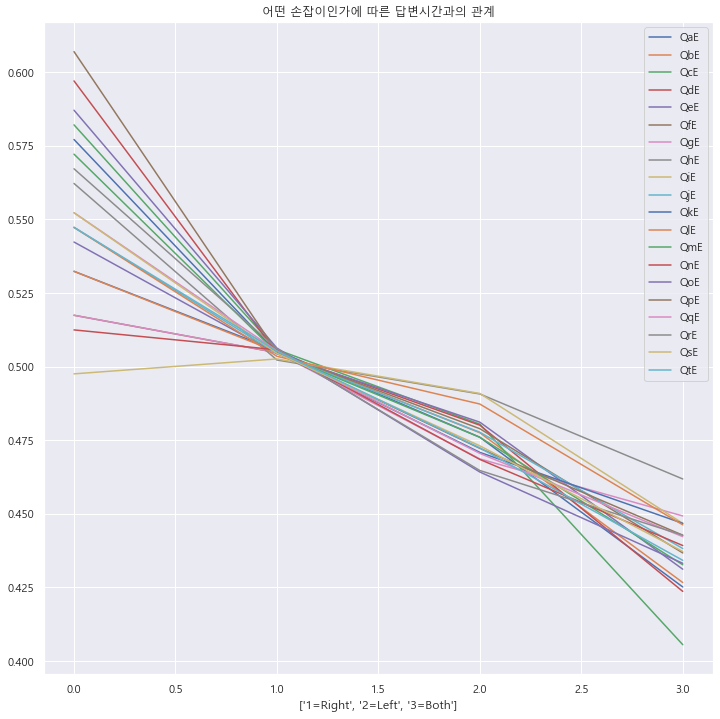

In [207]:
plt.figure(figsize=(12,12))
plt.plot(data.groupby('hand')[qt].mean())
plt.legend(qt)
plt.title('어떤 손잡이인가에 따른 답변시간과의 관계')
plt.xlabel(['1=Right', '2=Left', '3=Both'])

In [175]:
data.groupby('married')[qt].mean()

,QaE,QbE,QcE,QdE,QeE,QfE,QgE,QhE,QiE,QjE,QkE,QlE,QmE,QnE,QoE,QpE,QqE,QrE,QsE,QtE
married,,,,,,,,,,,,,,,,,,,,
0,0.561983,0.487603,0.537190,0.520661,0.487603,0.561983,0.545455,0.495868,0.487603,0.471074,0.520661,0.512397,0.603306,0.495868,0.520661,0.438017,0.471074,0.462810,0.586777,0.520661
1,0.452680,0.475504,0.470235,0.475023,0.484066,0.464738,0.459190,0.484066,0.487866,0.477252,0.491033,0.478367,0.470260,0.468563,0.470210,0.473680,0.474288,0.466587,0.461166,0.468437
2,0.603209,0.553959,0.567768,0.556354,0.535441,0.579981,0.587005,0.540948,0.526181,0.554598,0.522909,0.552043,0.568167,0.568966,0.569764,0.563538,0.554518,0.571999,0.583174,0.572557
3,0.614581,0.555254,0.566117,0.552747,0.533111,0.576562,0.597451,0.522248,0.524755,0.539795,0.506580,0.541466,0.557134,0.573637,0.558596,0.550240,0.566743,0.585544,0.589513,0.564028


Text(0.5, 0, "['1=Never married', '2=Currently married', '3=Previously married', '0=Other']")

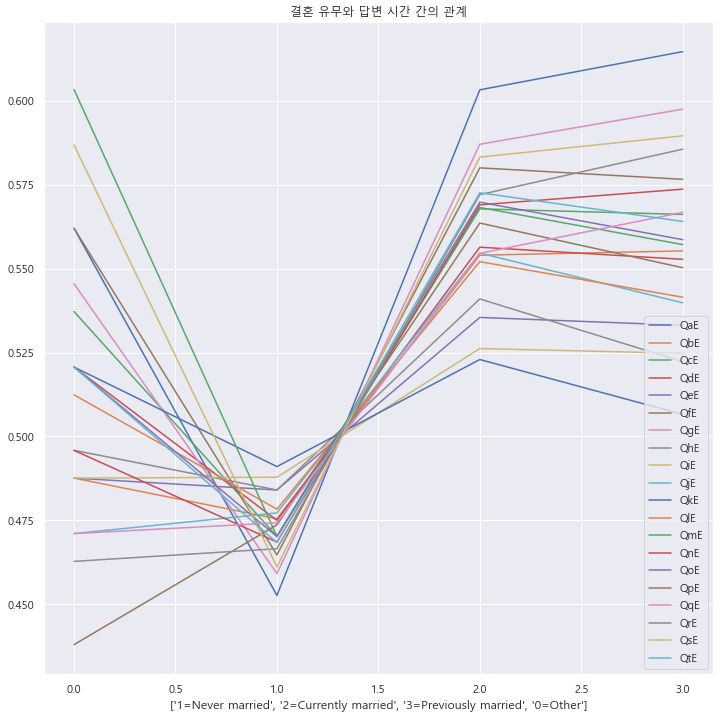

In [208]:
plt.figure(figsize=(12,12))
plt.plot(data.groupby('married')[qt].mean())
plt.legend(qt)
plt.title('결혼 유무와 답변 시간 간의 관계')
plt.xlabel(['1=Never married','2=Currently married', '3=Previously married', '0=Other'])

In [177]:
data.groupby('race')[qt].mean()

,QaE,QbE,QcE,QdE,QeE,QfE,QgE,QhE,QiE,QjE,QkE,QlE,QmE,QnE,QoE,QpE,QqE,QrE,QsE,QtE
race,,,,,,,,,,,,,,,,,,,,
Arab,0.482679,0.508083,0.505774,0.558891,0.565820,0.538106,0.505774,0.503464,0.496536,0.535797,0.538106,0.568129,0.535797,0.521940,0.508083,0.524249,0.503464,0.480370,0.519630,0.494226
Asian,0.509532,0.523417,0.519887,0.548011,0.554483,0.584137,0.508120,0.497176,0.521181,0.517651,0.525535,0.537656,0.540480,0.496352,0.523417,0.501059,0.512356,0.486467,0.501883,0.503766
Black,0.487985,0.548983,0.512754,0.513124,0.536784,0.527172,0.552311,0.561922,0.532348,0.530869,0.562292,0.575231,0.510906,0.544547,0.524954,0.550092,0.534196,0.554898,0.556007,0.514233
Indigenous Australian,0.453125,0.296875,0.515625,0.421875,0.359375,0.625000,0.421875,0.484375,0.484375,0.484375,0.531250,0.453125,0.437500,0.421875,0.500000,0.468750,0.375000,0.500000,0.453125,0.531250
Native American,0.479699,0.520301,0.517293,0.473684,0.437594,0.499248,0.509774,0.506767,0.487218,0.508271,0.505263,0.514286,0.478195,0.526316,0.494737,0.508271,0.490226,0.515789,0.488722,0.490226
Other,0.484482,0.499535,0.489314,0.510686,0.505111,0.501765,0.501951,0.507898,0.514031,0.505296,0.500093,0.515703,0.497677,0.507898,0.491358,0.502509,0.501580,0.505854,0.505482,0.496190
White,0.501021,0.490783,0.495762,0.486493,0.484783,0.478604,0.493004,0.494868,0.490655,0.492111,0.488740,0.483506,0.489991,0.495430,0.493898,0.495353,0.494664,0.497983,0.493694,0.498187


Text(0.5, 1.0, '인종과 답변시간 간의 관계')

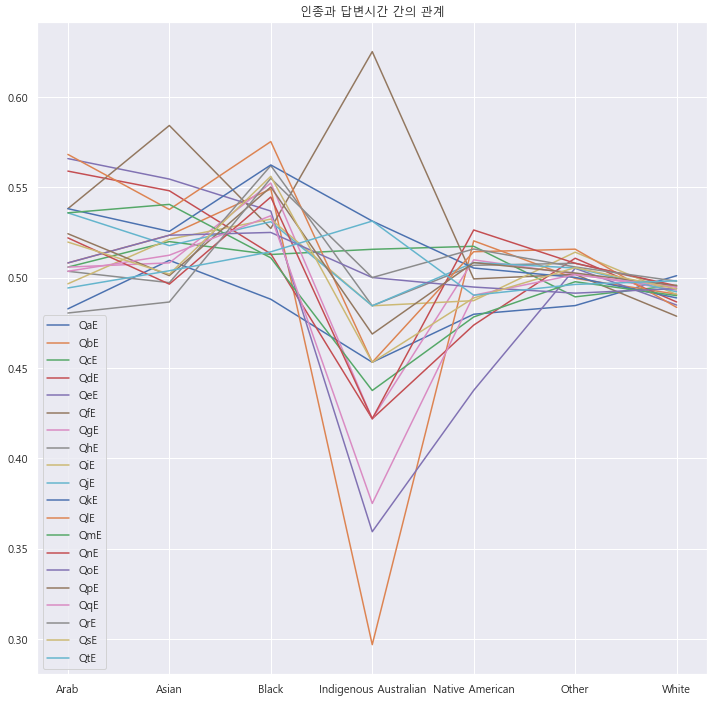

In [196]:
plt.figure(figsize=(12,12))
plt.plot(data.groupby('race')[qt].mean())
plt.legend(qt)
plt.title('인종과 답변시간 간의 관계')

In [179]:
data.groupby('religion')[qt].mean()

,QaE,QbE,QcE,QdE,QeE,QfE,QgE,QhE,QiE,QjE,QkE,QlE,QmE,QnE,QoE,QpE,QqE,QrE,QsE,QtE
religion,,,,,,,,,,,,,,,,,,,,
Agnostic,0.475991,0.477583,0.463505,0.449175,0.462248,0.448001,0.451856,0.482025,0.487220,0.464007,0.490405,0.444482,0.462499,0.474566,0.471214,0.477080,0.479678,0.482611,0.457890,0.475823
Atheist,0.452871,0.466214,0.457163,0.451311,0.457475,0.437812,0.451311,0.489700,0.483380,0.459894,0.508115,0.428137,0.462235,0.458021,0.470037,0.467853,0.465824,0.451779,0.455914,0.471208
Buddhist,0.544268,0.534017,0.543336,0.533085,0.547064,0.551724,0.540541,0.506990,0.519105,0.537745,0.499534,0.538677,0.544268,0.522833,0.524697,0.491146,0.508854,0.505126,0.511650,0.519105
Christian_Catholic,0.526079,0.512977,0.540554,0.537684,0.529573,0.542800,0.533317,0.501248,0.512104,0.533691,0.499875,0.555902,0.526079,0.521213,0.512853,0.514849,0.524332,0.515473,0.527577,0.516970
Christian_Mormon,0.522222,0.544444,0.555556,0.551852,0.525926,0.546296,0.516667,0.483333,0.496296,0.522222,0.438889,0.585185,0.464815,0.485185,0.546296,0.512963,0.470370,0.533333,0.512963,0.503704
Christian_Other,0.528441,0.533991,0.530446,0.544782,0.540157,0.535687,0.552798,0.529058,0.508864,0.547094,0.492524,0.565593,0.534608,0.538770,0.526437,0.540311,0.537845,0.555419,0.551873,0.536920
Christian_Protestant,0.534508,0.499094,0.517872,0.522319,0.494647,0.527096,0.519025,0.504365,0.504200,0.506342,0.464503,0.533026,0.504859,0.519848,0.515731,0.514083,0.505024,0.529896,0.518860,0.512766
Hindu,0.540068,0.539503,0.575621,0.593679,0.606659,0.667607,0.525395,0.511287,0.516366,0.538375,0.555305,0.579571,0.582393,0.484763,0.568284,0.531038,0.530474,0.500000,0.536682,0.532167
Jewish,0.477462,0.435726,0.464107,0.425710,0.447412,0.437396,0.422371,0.429048,0.430718,0.447412,0.434057,0.439065,0.454090,0.482471,0.457429,0.430718,0.449082,0.460768,0.440735,0.445743


Text(0.5, 1.0, '종교와 답변 시간 간의 관계')

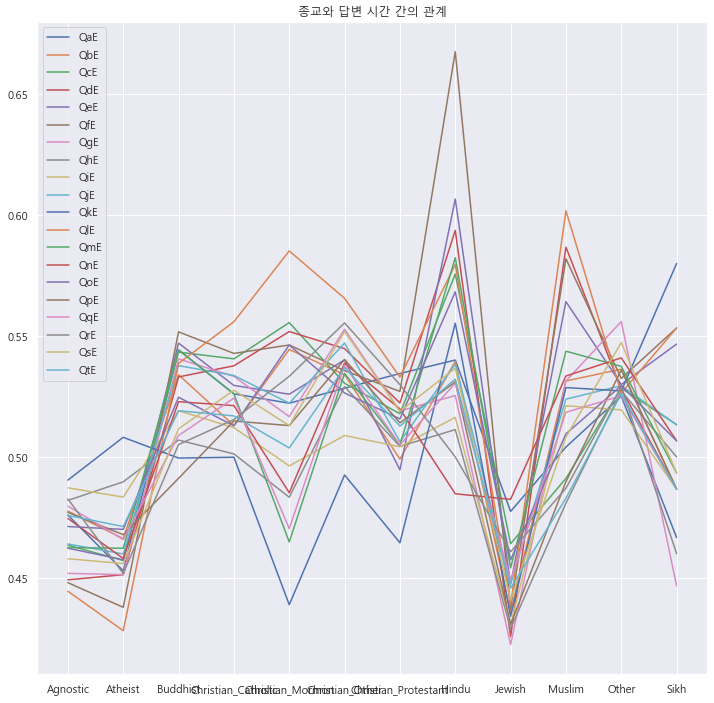

In [197]:
plt.figure(figsize=(12,12))
plt.plot(data.groupby('religion')[qt].mean())
plt.legend(qt)
plt.title('종교와 답변 시간 간의 관계')